In [186]:
from datetime import datetime
import os
import io
import re
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [305]:
def get_df (file_name, print_df=False):
    path = os.path.join(os.getcwd(), 'data', file_name)
    df = pd.read_csv(path, encoding='latin-1')
    if print_df is True:
        display(df.head())
        print(df.shape)
    return df

In [267]:
df_driver = get_df('drivers.csv', print_df=True)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


(848, 9)


In [271]:
df_driver.loc[df_driver['driverId']==30]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
29,30,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher


In [58]:
df_race = get_df('races.csv', print_df=True)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


(1033, 8)


In [59]:
df_result = get_df('results.csv', print_df=True)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


(24620, 18)


In [60]:
df_constr = get_df('constructors.csv', print_df=True)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


(210, 5)


In [61]:
df_constr_result = get_df('constructor_results.csv', print_df=True)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


(11560, 5)


In [62]:
df_constr_stand = get_df('constructor_standings.csv', print_df=True)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


(12326, 7)


### Add win column

In [291]:
df = get_df('results.csv')
df['win'] = 0
df['win'] = df['position'].mask(df_result['position'] != '1', 0)
display(df.head())
print(df.shape)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


(24620, 18)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,win
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,0


(24620, 19)


### Top drivers in history

In [64]:
n_wins = df_result.loc[df['position'] == str(1)]
n_wins_driver = n_wins.groupby('driverId')['driverId'].count()
n_wins_driver.head()

driverId
1    84
3    23
4    32
5     1
8    21
Name: driverId, dtype: int64

In [65]:
n_wins_top_10 = n_wins_driver.nlargest(10)
n_wins_top_10.head()

driverId
30     91
1      84
20     53
117    51
102    41
Name: driverId, dtype: int64

In [66]:
names = []
for Id in n_wins_top_10.index:
    names.append(df_driver.loc[df_driver['driverId'] == Id, 'surname'].values[0])
print(names)

['Schumacher', 'Hamilton', 'Vettel', 'Prost', 'Senna', 'Alonso', 'Mansell', 'Stewart', 'Lauda', 'Clark']


<BarContainer object of 10 artists>

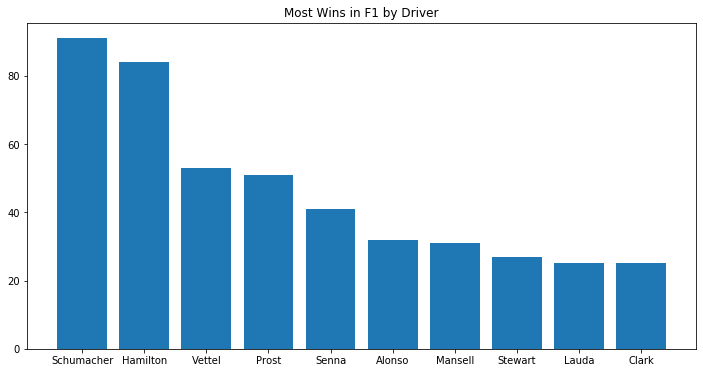

In [67]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Driver')
plt.bar(names, n_wins_top_10)

### Top constructors in history

In [68]:
n_wins_constructor = n_wins.groupby('constructorId')['constructorId'].count()
n_wins_constructor.head()

constructorId
1    178
2      1
3    114
4     35
5      1
Name: constructorId, dtype: int64

In [69]:
n_wins_top_10c = n_wins_constructor.nlargest(10)
n_wins_top_10c.head()

constructorId
6      239
1      178
3      114
131    102
9       62
Name: constructorId, dtype: int64

In [70]:
names_c = []
for Id in n_wins_top_10c.index:
      names_c.append(df_constr.loc[df_constr['constructorId'] == Id, 'name'].values[0])
print(names_c)

['Ferrari', 'McLaren', 'Williams', 'Mercedes', 'Red Bull', 'Team Lotus', 'Renault', 'Benetton', 'Tyrrell', 'Brabham']


<BarContainer object of 10 artists>

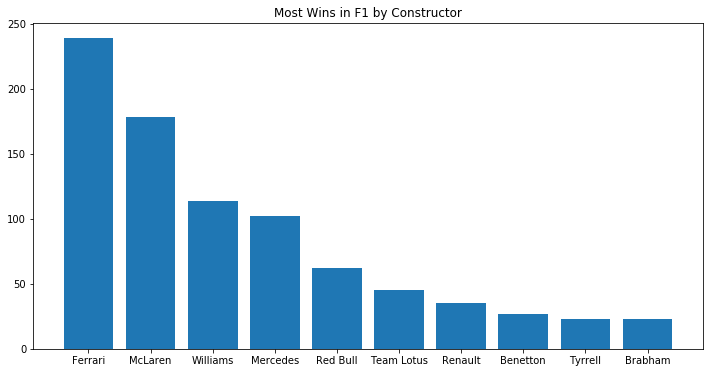

In [71]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Constructor')
plt.bar(names_c, n_wins_top_10c)

### Label: time from first position

In [468]:
df_race = get_df('races.csv')
year=[]
for raceId in df_race['raceId']:
    year.append(df_race.loc[df_race['raceId'] == raceId, 'year'].values[0])

In [469]:
df_race['year'] = year
df_race['year'].unique()

array([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2010, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [471]:
time_from_first = []
current_time = 0

for index, row in df_result.iterrows():
    if row['milliseconds'] == '\\N':
        time_from_first.append(1000000)
    elif int(row['positionOrder']) == 1:
        time_from_first.append(0)
        current_time = int(row['milliseconds'])
    else:
        time_from_first.append(int(row['milliseconds']) - current_time)
  

In [477]:
display(df_result.loc[df_result['raceId']==69]['milliseconds'])

1094    5032413
1095    5048564
1096    5056366
1097    5066514
1098    5076009
1099    5079130
1100    5081282
1101    5108508
1102    5109345
1103         \N
1104         \N
1105         \N
1106         \N
1107         \N
1108         \N
1109         \N
1110         \N
1111         \N
1112         \N
1113         \N
1114         \N
1115         \N
Name: milliseconds, dtype: object

In [437]:
df_result = get_df('results.csv')
mask = (df_result['fastestLapTime'] != 0)
races = df_result['raceId'].unique()

df_result['min_fastest_lap_time'] = 0
df_result['min_fastest_lap_speed'] = 0
df_result['avg_fastest_lap_time'] = 0
df_result['avg_fastest_lap_speed'] = 0
df_result['max_fastest_lap_time'] = 0
df_result['max_fastest_lap_speed'] = 0

missing_time = []
for race in races:
    set_time = df_result.loc[(df_result['raceId']==race) &\
                          (df_result['fastestLapTime']!='\\N')]
    times = set_time['fastestLapTime']
    speeds = set_time['fastestLapSpeed']
    
#     print(times)
    count = times.size
    
    if count is 0:
        missing_time.append(race)
    else:
        avg_time = 0
        avg_speed = 0
        
        # Change time strings to time in seconds
        for i, row in set_time.iterrows():
            timestring = row['fastestLapTime']
            time_list = re.split(':', timestring)
            sec_time = float(time_list[0]) * 60 + float(time_list[1])
            
            df_result.loc[(df_result['fastestLapTime'] == timestring) &
                          (df_result['raceId'] == race), 'fastestLapTime'] = sec_time
            avg_time += sec_time
        
        # Find avg fastest lap time
        avg_time = avg_time / count
        avg_times[race] = avg_time
        mask = (df_result['raceId']==race)
        df_result.loc[mask, 'avg_fastest_lap_time'] = avg_time
        
        # Find slowest overall lap time
        set_time = df_result.loc[(df_result['raceId']==race) &\
                          (df_result['fastestLapTime']!='\\N')]
        times = set_time['fastestLapTime']
        max_time = times.max()
        df_result.loc[mask, 'max_fastest_lap_time'] = max_time
        
        # Find fastest overall lap time
        min_time = times.min()
        df_result.loc[mask, 'min_fastest_lap_time'] = min_time
        
        all_starters = df_result.loc[df_result['raceId']==race]
        
        # Find avg fastest lap speed
        for speed in speeds:
            avg_speed += float(speed)
        avg_speed = avg_speed / count
        df_result.loc[mask, 'avg_fastest_lap_speed'] = avg_speed
        
        # Find max overall fastest speed
        max_speed = speeds.max()
        df_result.loc[mask, 'max_fastest_lap_speed'] = max_speed
        
        # Find max overall fastest speed
        min_speed = speeds.min()
        df_result.loc[mask, 'min_fastest_lap_speed'] = min_speed

print(len(missing_time), ' races are missing fastest lap data')

713  races are missing fastest lap data


In [438]:
# No timing data available from 1950 to 2003, so these years are removed
years = []
for race in missing_time:
    no_times = df_race.loc[df_race['raceId']==race]
    year = no_times['year'].unique()[0]
    if year not in years:
        years.append(year)
        
print(years)

[2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950]


In [439]:
# filter out races with no timing data
for race in missing_time:
    df_result = df_result.loc[df_result['raceId'] != race]
    
display(df_result.shape)

(6511, 24)

In [440]:
display(df_result)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,min_fastest_lap_time,min_fastest_lap_speed,avg_fastest_lap_time,avg_fastest_lap_speed,max_fastest_lap_time,max_fastest_lap_speed
0,1,18,1,1,22,1,1,1,1,10.0,...,2,87.452,218.300,1,87.418,207.461,89.100529,214.306647,92.021,218.385
1,2,18,2,2,3,5,2,2,2,8.0,...,3,87.739,217.586,1,87.418,207.461,89.100529,214.306647,92.021,218.385
2,3,18,3,3,7,7,3,3,3,6.0,...,5,88.09,216.719,1,87.418,207.461,89.100529,214.306647,92.021,218.385
3,4,18,4,4,5,11,4,4,4,5.0,...,7,88.603,215.464,1,87.418,207.461,89.100529,214.306647,92.021,218.385
4,5,18,5,1,23,3,5,5,5,4.0,...,1,87.418,218.385,1,87.418,207.461,89.100529,214.306647,92.021,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,24621,1030,841,51,99,16,16,16,16,0.0,...,15,103.256,193.639,11,99.283,191.333,102.185950,195.705200,104.500,201.387
24616,24622,1030,847,3,63,18,17,17,17,0.0,...,13,103.074,193.981,11,99.283,191.333,102.185950,195.705200,104.500,201.387
24617,24623,1030,842,5,10,11,18,18,18,0.0,...,10,102.414,195.231,12,99.283,191.333,102.185950,195.705200,104.500,201.387
24618,24624,1030,9,3,88,19,19,19,19,0.0,...,20,104.5,191.333,12,99.283,191.333,102.185950,195.705200,104.500,201.387


In [540]:
df_result['fastest_time_delta'] = 0
df_result['fastest_speed_delta'] = 0
df_result['avg_time_delta'] = 0
df_result['avg_speed_delta'] = 0
df_result['gained_pos'] = 0

# remove dns/first lap crashes for now since this may bias data
# TODO: consider adding dns/first lap crashes back in (use null_mask)
# null_mask = (df_result['fastestLapTime']=='\\N')
mask = (df_result['fastestLapTime']!='\\N')
df_thin = df_result.loc[mask]

# Coerce columns to float
df_thin['fastestLapTime'] = df_thin['fastestLapTime'].astype(float)
df_thin['fastestLapSpeed'] = df_thin['fastestLapSpeed'].astype(float)
df_thin['min_fastest_lap_speed'] = df_thin['min_fastest_lap_speed'].astype(float)
df_thin['max_fastest_lap_speed'] = df_thin['max_fastest_lap_speed'].astype(float)

# Deltas are in percentages above fastest lap time
df_thin['fastest_time_delta'] = df_thin['fastestLapTime'] / df_thin['min_fastest_lap_time']

# Deltas are in percentages above fastest lap speed
df_thin['fastest_speed_delta'] = df_thin['fastestLapSpeed'] / df_thin['max_fastest_lap_speed']

# Deltas are in percentages w.r.t avg fastest lap time
df_thin['avg_time_delta'] = df_thin['fastestLapTime'] / df_thin['avg_fastest_lap_time']

# Deltas are in percentages above avg fastest lap speed
df_thin['avg_speed_delta'] = df_thin['fastestLapSpeed'] / df_thin['avg_fastest_lap_speed']

# Positions gained
# df_thin['gained_pos'] = df_thin['positionOrder'] - df_thin['grid']
for index, row in df_thin.iterrows():
    if row['grid'] == 0:
        df_thin.at[index, 'gained_pos'] = row['positionOrder'] - 20
    else:
        df_thin.at[index, 'gained_pos'] = row['positionOrder'] - row['grid']

/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [541]:
years = list(range(2004, 2020))

# get dict of raceId by round by year
year_dict = {}
df_race = get_df('races.csv')
for year in years:
    df_year = df_race.loc[df_race['year']==year]
    
    round_dict = {}
    rounds = df_year['round'].unique()
    for rnd in rounds:
        raceId = df_race.loc[(df_race['year']==year) & (df_race['round']==rnd)]['raceId'].unique()
        round_dict[rnd] = raceId[0]
    year_dict[year] = round_dict
    

In [606]:
# Add win column
df_thin['win'] = 0
df_thin['win'] = df_thin['position'].mask(df_thin['position'] != '1', 0)
df_thin['win'] = df_thin['win'].astype(int)

# Create df of previous race results
df_prev = None
for year in year_dict.keys():
    for rnd in year_dict[year].keys():
        
        if rnd > 1:
            # drop first rounds, get previous round raceId
            prevId = year_dict[year][rnd-1]
            race_data = df_thin.loc[df_thin['raceId']==prevId]
            
            # set current race id
            raceId = year_dict[year][rnd]
            race_data['current_id'] = raceId
            
            # Get fastest lap time and fastest speed of winner
            winner = race_data.loc[race_data['win']==1]
            winner_laptime = winner['fastestLapTime'].unique()[0]
            winner_speed = winner['fastestLapSpeed'].unique()[0]

            # Calculate deltas with respect to race winner
            race_data['winner_fastest_lap_delta'] = race_data['fastestLapTime'] - winner_laptime
            race_data['winner_fastest_speed_delta'] = race_data['fastestLapSpeed'] - winner_speed
            
            # Add true result column, current quali grid position (prior to race)
            race_data['actual_result'] = 0
            cur = df_result.loc[df_result['raceId']==raceId]
            
            for driver in race_data['driverId'].unique():
                try:
                    cur_data = cur.loc[cur['driverId']==driver]['positionOrder'].unique()[0]
                    past_entry_id = race_data.loc[race_data['driverId']==driver]['resultId'].unique()[0]
                    race_data.at[past_entry_id, 'actual_result'] = cur_data
                except:
                    # account for dnf/dsq
                    past_entry_id = race_data.loc[race_data['driverId']==driver]['resultId'].unique()[0]
                    race_data.at[past_entry_id, 'actual_result'] = 20
            race_data = race_data.dropna()
            
            # default to 20 to account for engine penalties, etc.
            race_data['cur_grid'] = 20
            for driver in race_data['driverId'].unique():
                try:
                    cur_data = cur.loc[cur['driverId']==driver]['grid'].unique()[0]
                    past_entry_id = race_data.loc[race_data['driverId']==driver]['resultId'].unique()[0]
                    race_data.at[past_entry_id, 'cur_grid'] = cur_data
                except:
                    # account for dnf/dsq
                    past_entry_id = race_data.loc[race_data['driverId']==driver]['resultId'].unique()[0]
                    race_data.at[past_entry_id, 'cur_grid'] = 20
            race_data = race_data.dropna()
            
            # add finishing time delta to winner
            times = race_data.loc[race_data['milliseconds']!='\\N']['milliseconds']
            time_num = []
            for time in times:
                time_num.append(float(time))
            max_time = max(time_num)
            min_time = min(time_num)
            race_data['winner_delta'] = 2 * int(max_time)
            for index, row in race_data.iterrows():
                if row['milliseconds'] == '\\N':
                    race_data.at[index, 'winner_delta'] = 2 * int(max_time)
                elif int(row['positionOrder']) == 1:
                    race_data.at[index, 'winner_delta'] = 0
                else:
                    race_data.at[index, 'winner_delta'] = int(row['milliseconds']) - int(min_time)
                    
            if df_prev is None:
                # Initial df assignment
                df_prev = race_data
            else:
                # concatenate additional dfs
                df_prev = pd.concat([df_prev, race_data])
# df_prev = df_prev.dropna()

/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/edie/miniconda3/envs/env_lab/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [607]:
display(df_prev.loc[df_prev['actual_result']==0])

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,avg_time_delta,avg_speed_delta,gained_pos,win,current_id,winner_fastest_lap_delta,winner_fastest_speed_delta,actual_result,cur_grid,winner_delta
1514,1515.0,90.0,30.0,6.0,1,1.0,1,1,1.0,10.0,...,0.968928,1.031683,0.0,1.0,91.0,0.000,0.000,0.0,20.0,0
1534,1535.0,91.0,30.0,6.0,1,1.0,1,1,1.0,10.0,...,0.982954,1.017055,0.0,1.0,92.0,0.000,0.000,0.0,20.0,0
1554,1555.0,92.0,30.0,6.0,1,1.0,1,1,1.0,10.0,...,0.978893,1.021346,0.0,1.0,93.0,0.000,0.000,0.0,20.0,0
1574,1575.0,93.0,30.0,6.0,1,2.0,1,1,1.0,10.0,...,0.970206,1.030341,-1.0,1.0,94.0,0.000,0.000,0.0,20.0,0
1594,1595.0,94.0,30.0,6.0,1,1.0,1,1,1.0,10.0,...,0.980627,1.019419,0.0,1.0,95.0,0.000,0.000,0.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24581,24587.0,1029.0,842.0,5.0,10,6.0,2,2,2.0,18.0,...,0.999460,1.000335,-4.0,0.0,1030.0,1.563,-4.724,0.0,20.0,6077
24582,24588.0,1029.0,832.0,1.0,55,20.0,3,3,3.0,15.0,...,1.009575,0.990312,-17.0,0.0,1030.0,2.296,-6.870,0.0,20.0,8896
24583,24589.0,1029.0,8.0,51.0,7,8.0,4,4,4.0,12.0,...,1.009258,0.990625,-4.0,0.0,1030.0,2.273,-6.803,0.0,20.0,9452
24584,24590.0,1029.0,841.0,51.0,99,12.0,5,5,5.0,10.0,...,1.007671,0.992185,-7.0,0.0,1030.0,2.158,-6.469,0.0,20.0,10201


In [609]:
# fix zero valued actual results
mask = df_prev['actual_result'] == 0
zero_df = df_prev.loc[mask]
count = 0
for i, row in zero_df.iterrows():
    
    actual_result = df_result.loc[(df_result['raceId']==row['current_id']) &
                                 (df_result['driverId']==row['driverId'])]
    try:
        result_pos = actual_result['positionOrder'].unique()[0]
        df_prev.at[i, 'actual_result'] = result_pos
    except:
        ++count
print(count)

display(df_prev.loc[df_prev['actual_result']==0])
        
# drop stubborn row
df_prev = df_prev.drop(22823)

display(df_prev.loc[df_prev['actual_result']==0])

0


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,avg_time_delta,avg_speed_delta,gained_pos,win,current_id,winner_fastest_lap_delta,winner_fastest_speed_delta,actual_result,cur_grid,winner_delta
22823,22828.0,941.0,833.0,209.0,98,18.0,13,13,13.0,0.0,...,1.026874,0.973597,-5.0,0.0,942.0,4.476,-8.919,0.0,20.0,11844468


In [610]:
# display(df_prev.dtypes)
cols = ['resultId', 'positionOrder', 'statusId', 'fastest_time_delta',\
        'fastest_speed_delta', 'avg_time_delta', 'avg_speed_delta', 'gained_pos',\
        'win', 'current_id', 'winner_fastest_lap_delta', 'winner_fastest_speed_delta',\
        'actual_result', 'winner_delta']

data = df_prev[cols]
display(data)
data.to_csv('data.csv', index=False)

,resultId,positionOrder,statusId,fastest_time_delta,fastest_speed_delta,avg_time_delta,avg_speed_delta,gained_pos,win,current_id,winner_fastest_lap_delta,winner_fastest_speed_delta,actual_result,winner_delta
1514,1515.0,1.0,1.0,1.000000,1.000000,0.968928,1.031683,0.0,1.0,91.0,0.000,0.000,1.0,0
1515,1516.0,2.0,1.0,1.000642,0.999361,0.969550,1.031024,0.0,0.0,91.0,0.054,-0.145,1.0,13605
1516,1517.0,3.0,1.0,1.011447,0.988684,0.980020,1.020008,-2.0,0.0,91.0,0.963,-2.568,4.0,34673
1517,1518.0,4.0,1.0,1.020196,0.980206,0.988497,1.011261,-4.0,0.0,91.0,1.699,-4.492,7.0,60423
1518,1519.0,5.0,1.0,1.013801,0.986388,0.982300,1.017640,2.0,0.0,91.0,1.161,-3.089,19.0,68536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,24601.0,16.0,11.0,1.054528,0.948295,1.028826,0.971785,-3.0,0.0,1030.0,3.691,-10.837,9.0,11225474
24596,24602.0,17.0,4.0,1.009703,0.990393,0.985094,1.014926,15.0,0.0,1030.0,0.522,-1.600,14.0,11225474
24597,24603.0,18.0,4.0,1.010255,0.989850,0.985632,1.014370,4.0,0.0,1030.0,0.561,-1.719,17.0,11225474
24598,24604.0,19.0,22.0,1.026946,0.973762,1.001916,0.997883,2.0,0.0,1030.0,1.741,-5.249,15.0,11225474
